In [1]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import pandas as pd

In [8]:
from shapely.geometry import Polygon

In [2]:
# Dorris Ranch Historic District
df = pd.DataFrame({'x': [498550, 499170, 498320, 498320, 498500, 498500], 
                   'y': [4875250, 4874590, 4874350, 4875210, 4875210, 4875250]})

In [3]:
geom = gpd.points_from_xy(df.x, df.y, crs="EPSG:26710")

In [5]:
type(geom)

geopandas.array.GeometryArray

In [9]:
s = gpd.GeoSeries([Polygon([(498550, 4875250), (499170, 4874590), (498320, 4874350), 
                            (498320, 4875210), (498500, 4875210), (498500,4875250)])])

In [10]:
s.set_crs(epsg=26710)

0    POLYGON ((498550.000 4875250.000, 499170.000 4...
dtype: geometry

In [12]:
d = {'name': ['Dorris Ranch Historic District'], 'geometry': s}

In [14]:
gdf = gpd.GeoDataFrame(d, crs="EPSG:26710")

In [15]:
MPObd = gpd.read_file("V:/Data/Transportation/MPO_Bound.shp")

In [16]:
gdf = gdf.to_crs(epsg=3857)

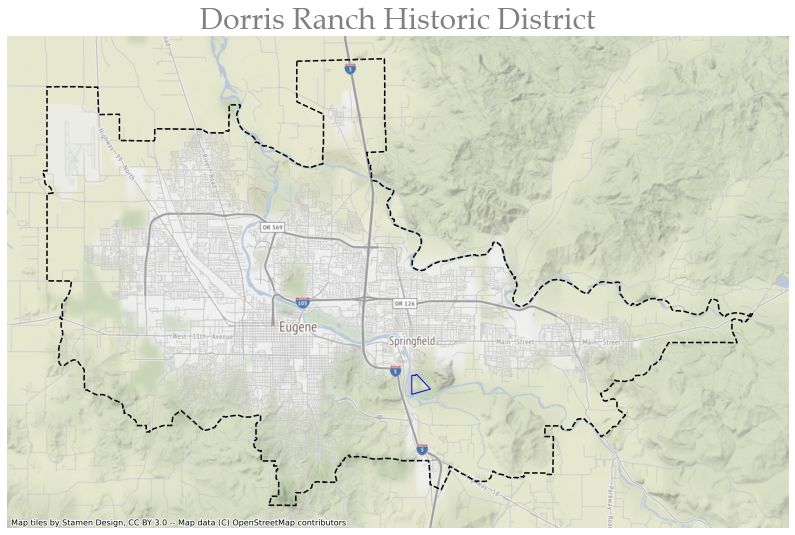

In [17]:
fig, ax = plt.subplots(figsize=(14, 12))
gdf.plot(ax=ax, facecolor="none", edgecolor="blue", aspect=1)
MPObd.plot(ax=ax, facecolor="none", edgecolor="black", linestyle='--', linewidth = 1.5, aspect=1)
ctx.add_basemap(ax, alpha = 0.7)
plt.title("Dorris Ranch Historic District", fontsize=30, fontname="Palatino Linotype", 
          color="grey")
ax.axis("off");

In [19]:
spr_hd = gpd.read_file(r'T:\MPO\RTP\FY20 2045 Update\Data and Resources\Data\ForAppendixF\Historic\Springfield\washburndist.shp')

In [20]:
spr_hd = spr_hd.to_crs(epsg=3857)

In [22]:
spr_hd['name'] = 'Washburne Historic District'

In [30]:
sprgdf = gdf.append(spr_hd[['name', 'geometry']], ignore_index = True)

In [33]:
path = r'T:\MPO\RTP\FY20 2045 Update\Data and Resources\Data\ForAppendixF\Historic'

In [34]:
sprgdf.to_file(os.path.join(path, 'Springfield', 'NationalRegisterHistoricDistrictsSPR.shp'))

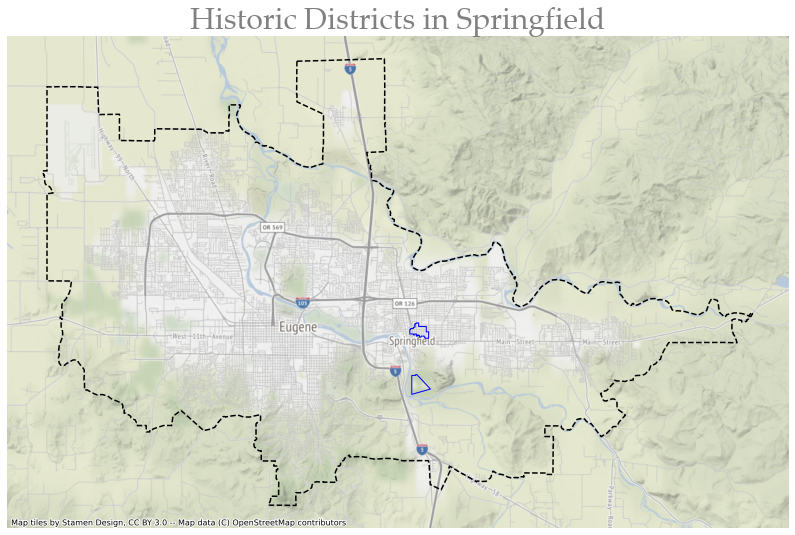

In [36]:
fig, ax = plt.subplots(figsize=(14, 12))
sprgdf.plot(ax=ax, facecolor="none", edgecolor="blue", aspect=1)
MPObd.plot(ax=ax, facecolor="none", edgecolor="black", linestyle='--', linewidth = 1.5, aspect=1)
ctx.add_basemap(ax, alpha = 0.7)
plt.title("Historic Districts in Springfield", fontsize=30, fontname="Palatino Linotype", 
          color="grey")
ax.axis("off");

In [37]:
# Historic districts in Eugene
eug_hd = gpd.read_file(r'T:\MPO\RTP\FY20 2045 Update\Data and Resources\Data\ForAppendixF\Historic\Eugene\HistoricDistricts.shp')

In [39]:
eug_hd.DistrictTy.unique()

array(['National Register', 'City Landmark'], dtype=object)

In [40]:
# include only national register districts
eug_hd = eug_hd[eug_hd.DistrictTy == 'National Register']

In [41]:
# read Coburg historic district from the last RTP data
cob_hd = gpd.read_file(r'T:\MPO\RTP\FY11 2035 Update\Environmental Coordination\Historic Properties\Historical_Districts.shp')

In [43]:
cob_hd.rename(columns={'Name':'name'}, inplace=True)

In [44]:
cob_hd = cob_hd[cob_hd.name == 'Coburg Historic District']

In [57]:
eug_hd = eug_hd.to_crs(epsg=3857)

In [58]:
clmpo_hd = eug_hd[['name', 'geometry']].append(sprgdf, ignore_index=True)

In [59]:
cob_hd = cob_hd.to_crs(epsg=3857)

In [60]:
clmpo_hd = clmpo_hd.append(cob_hd[['name', 'geometry']])

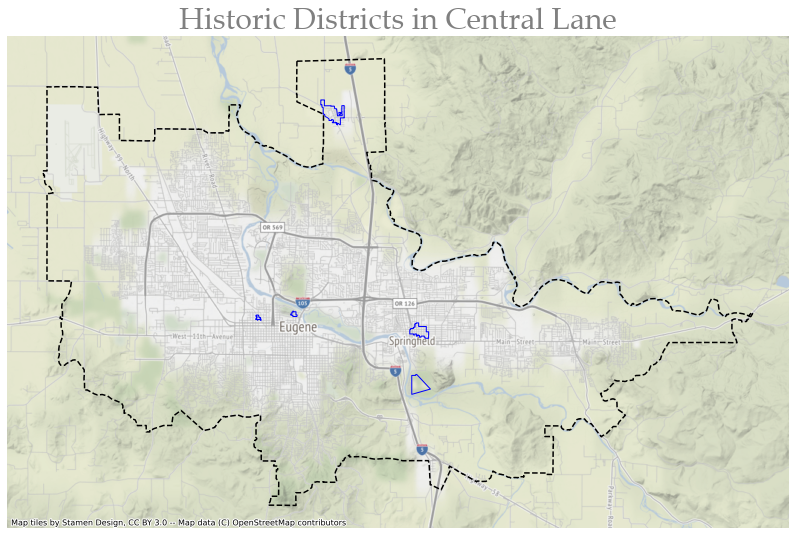

In [62]:
fig, ax = plt.subplots(figsize=(14, 12))
clmpo_hd.plot(ax=ax, facecolor="none", edgecolor="blue", aspect=1)
MPObd.plot(ax=ax, facecolor="none", edgecolor="black", linestyle='--', linewidth = 1.5, aspect=1)
ctx.add_basemap(ax, alpha = 0.7)
plt.title("Historic Districts in Central Lane", fontsize=30, fontname="Palatino Linotype", 
          color="grey")
ax.axis("off");

In [63]:
clmpo_hd.to_file(os.path.join(path, 'NationalRegisterHistoricDistrictsCLMPO.shp'))